In [1]:
#This section loads the csv file into a numpy data matrix
import numpy as np
import csv
import matplotlib.pyplot as plt

data = [] # Create empty data list

#Load csv file into data --- 
with open('digitData.csv') as csvfile: 
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if len(row) != 0:
            data = data + [row]
#---

data =  np.asarray(data) #Convert regular array to numpy array.
print(data)
print("done")

[['label' 'pixel0' 'pixel1' ..., 'pixel781' 'pixel782' 'pixel783']
 ['1' '0' '0' ..., '0' '0' '0']
 ['0' '0' '0' ..., '0' '0' '0']
 ..., 
 ['7' '0' '0' ..., '0' '0' '0']
 ['6' '0' '0' ..., '0' '0' '0']
 ['9' '0' '0' ..., '0' '0' '0']]
done


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18  30 137 137 192  86  72   1
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  13  86 250 254 254 254 254 217 246 151
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  16 179 254 254 254 254 254 254 254 254 254
  231  54  15   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254
  254 254 104   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  61 191 254 254 254 254 254 109  83 19

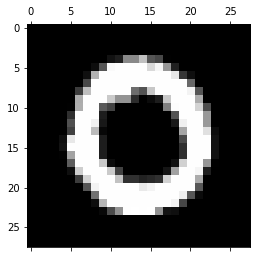

In [2]:
#Cell used to visualize data as a human does

displayPixelValues = data[2][1:]  #Gather all pixel values from first data point

displayPixelValues = np.reshape(displayPixelValues, (-1, 28)) #Reshape data to 28 by 28 array instead of 784 by 1 array
displayPixelValues = displayPixelValues.astype(np.int) #Convert the data into integers from strings
print(displayPixelValues) #Print out array of single digit

plt.matshow(displayPixelValues, fignum=10,cmap=plt.cm.gray) #Make grayscale representation of digit
plt.show() #Show grayscale representation of digit

In [3]:
def sigmoid(x):
    #If overflow error, return small values for zero
    return 1/(1+np.exp(-x))

In [23]:
#np.random.seed(1)

layer0_neurons = 784 #Number of pixels = 784
layer1_neurons = 30 #Number of middle layer neurons. I picked 30 for now
layer2_neurons = 10 #Output neurons here. 
                    #The activation of the output neurons are the "guesses"
#Initialize random weights and biases
layer1_b = np.zeros((layer1_neurons,1))#Initialize layer_1 biases to 0. This is a 784 by 1 matrix
layer1_w = (2*np.random.random((layer1_neurons,layer0_neurons)) - 1) /100 #Initialize layer_1 weights to a value between -.01 and .01 This is a 30 by 784 matrix
layer2_b = np.zeros((layer2_neurons,1)) #Initialize layer_2 biases to 0. This is a 30 by 1 matrix
layer2_w = (2*np.random.random((layer2_neurons,layer1_neurons)) - 1) /100 #Initialize layer_2 weights to to a value between -.01 and .01 This is a 10 by 30 matrix

In [24]:
#Matrix Calculation of Forward Propogation
#
trainingSize = 1000 #Number of training sample
Xdata = data[1:trainingSize+1,1:] #Get pixel values of data samples
Xdata = Xdata.T #Transpose - Make columns rows and rows columns
Xdata = Xdata.astype(np.int) #Convert values from string to integer
Xdata = Xdata/255 #Remap grayscale values (normalize)

labels = data[1:,0].astype(np.int)  #Get labels of each digit an numpy list

Xdata.shape



(784, 1000)

In [25]:
# FP
z_1 = np.dot(layer1_w,Xdata)+layer1_b
a_1 = sigmoid(z_1)

z_2 = np.dot(layer2_w,a_1)+layer2_b
a_2 = sigmoid(z_2)

print("activation 2:")
print(a_2)

activation 2:
[[ 0.50476147  0.50477502  0.50462667 ...,  0.50468956  0.50467278
   0.5046843 ]
 [ 0.49609741  0.49600569  0.49611139 ...,  0.4960667   0.49618788
   0.49610096]
 [ 0.50227532  0.50252622  0.50246036 ...,  0.50243621  0.50243074
   0.50240922]
 ..., 
 [ 0.49977578  0.49985758  0.49984129 ...,  0.49978552  0.4999595
   0.4998244 ]
 [ 0.50339765  0.50335216  0.50329734 ...,  0.50326122  0.50324352
   0.50325978]
 [ 0.5079332   0.50795314  0.50796101 ...,  0.50795139  0.50799928
   0.50788907]]


In [26]:
#Accuracy Calculation
testSize = 1000
predictions = []
for i in range(testSize):
    maxIndex = 0
    maxValue = a_2[0,i]
    for j in range(a_2[:,i].size):
        if(a_2[j,i] > maxValue):
            maxIndex = j
            maxValue = a_2[j,i]
    #print("highest a_2 value for digit",i,": ", maxValue)
    predictions.append(maxIndex)

#print("predictions: ")
#print(predictions)

correct = 0
total = trainingSize+1 
for i in range(testSize):
    if(labels[i] == predictions[i]):
        correct+=1
accuracy = round(((correct/total)*100),2)
print(str(accuracy) + '% Accurate')
print(a_2)
#print("predictions: ",predictions)

10.19% Accurate
[[ 0.50476147  0.50477502  0.50462667 ...,  0.50468956  0.50467278
   0.5046843 ]
 [ 0.49609741  0.49600569  0.49611139 ...,  0.4960667   0.49618788
   0.49610096]
 [ 0.50227532  0.50252622  0.50246036 ...,  0.50243621  0.50243074
   0.50240922]
 ..., 
 [ 0.49977578  0.49985758  0.49984129 ...,  0.49978552  0.4999595
   0.4998244 ]
 [ 0.50339765  0.50335216  0.50329734 ...,  0.50326122  0.50324352
   0.50325978]
 [ 0.5079332   0.50795314  0.50796101 ...,  0.50795139  0.50799928
   0.50788907]]


In [8]:
#Squared Error Sum Calculation Used in Back Propogation

errors = a_2.copy() #Copy elements of activation_2 into errors
for d in range(trainingSize):
    target = labels[d] #Get label of current digit
    errors[target][d] = 1 - a_2[target][d] #Get error of index of target value
    squaredErrorSum = 0 
    for e in range(errors[:,d].size):
        squaredErrorSum += (errors[e][d] ** 2) #Sum up errors and square them
    print("Squared error sum for digit ",d," is: ",squaredErrorSum)
    
print('a2: \n',a_2)
print("errors: \n",errors)



Squared error sum for digit  0  is:  2.49158158205
Squared error sum for digit  1  is:  2.49739141918
Squared error sum for digit  2  is:  2.4910982577
Squared error sum for digit  3  is:  2.5068174368
Squared error sum for digit  4  is:  2.49755880503
Squared error sum for digit  5  is:  2.49764220153
Squared error sum for digit  6  is:  2.49457715507
Squared error sum for digit  7  is:  2.50765350903
Squared error sum for digit  8  is:  2.50460467733
Squared error sum for digit  9  is:  2.50714651704
Squared error sum for digit  10  is:  2.50139718416
Squared error sum for digit  11  is:  2.50005227623
Squared error sum for digit  12  is:  2.49138701064
Squared error sum for digit  13  is:  2.50723329246
Squared error sum for digit  14  is:  2.50718584646
Squared error sum for digit  15  is:  2.49116075943
Squared error sum for digit  16  is:  2.50507749765
Squared error sum for digit  17  is:  2.49807054588
Squared error sum for digit  18  is:  2.49455342688
Squared error sum for di

Squared error sum for digit  190  is:  2.50451061646
Squared error sum for digit  191  is:  2.49158695452
Squared error sum for digit  192  is:  2.50764902411
Squared error sum for digit  193  is:  2.49755819282
Squared error sum for digit  194  is:  2.50821659834
Squared error sum for digit  195  is:  2.4975175676
Squared error sum for digit  196  is:  2.49749897995
Squared error sum for digit  197  is:  2.50125571866
Squared error sum for digit  198  is:  2.50753173763
Squared error sum for digit  199  is:  2.50477355082
Squared error sum for digit  200  is:  2.49726778507
Squared error sum for digit  201  is:  2.49807853721
Squared error sum for digit  202  is:  2.50822379234
Squared error sum for digit  203  is:  2.49755548813
Squared error sum for digit  204  is:  2.49733896601
Squared error sum for digit  205  is:  2.50644208278
Squared error sum for digit  206  is:  2.49489353129
Squared error sum for digit  207  is:  2.5047527512
Squared error sum for digit  208  is:  2.4950188

Squared error sum for digit  465  is:  2.50422197629
Squared error sum for digit  466  is:  2.50168142711
Squared error sum for digit  467  is:  2.50664098984
Squared error sum for digit  468  is:  2.49139818903
Squared error sum for digit  469  is:  2.49978453441
Squared error sum for digit  470  is:  2.50754149628
Squared error sum for digit  471  is:  2.50838407603
Squared error sum for digit  472  is:  2.49782418643
Squared error sum for digit  473  is:  2.50463296204
Squared error sum for digit  474  is:  2.50488294693
Squared error sum for digit  475  is:  2.4997657743
Squared error sum for digit  476  is:  2.49165635899
Squared error sum for digit  477  is:  2.50413339621
Squared error sum for digit  478  is:  2.49461552473
Squared error sum for digit  479  is:  2.50455416839
Squared error sum for digit  480  is:  2.49174083911
Squared error sum for digit  481  is:  2.50748107822
Squared error sum for digit  482  is:  2.50651136348
Squared error sum for digit  483  is:  2.499771

Squared error sum for digit  852  is:  2.50818857468
Squared error sum for digit  853  is:  2.5048013636
Squared error sum for digit  854  is:  2.49771706158
Squared error sum for digit  855  is:  2.50000233011
Squared error sum for digit  856  is:  2.49496746029
Squared error sum for digit  857  is:  2.4910907397
Squared error sum for digit  858  is:  2.50140033944
Squared error sum for digit  859  is:  2.50415325646
Squared error sum for digit  860  is:  2.50830395
Squared error sum for digit  861  is:  2.49962587226
Squared error sum for digit  862  is:  2.50160679468
Squared error sum for digit  863  is:  2.50666120397
Squared error sum for digit  864  is:  2.49976938619
Squared error sum for digit  865  is:  2.50675457856
Squared error sum for digit  866  is:  2.49165607621
Squared error sum for digit  867  is:  2.50741675927
Squared error sum for digit  868  is:  2.50085810196
Squared error sum for digit  869  is:  2.50660818213
Squared error sum for digit  870  is:  2.4976406705